Body brain weights outliers
---

Exercise: Load an plot the data
---

> **Exercise**: Load the data set into a `data_df` DataFrame. Load the `body` and `brain` columns into x/y Numpy arrays. Apply the Numpy `log()` function to both variables, store the result in a `x_log` and a `y_log` variable, and plot them.

In [ ]:
import pandas as pd
import os

# Load data set if the csv file resides in a folder called data. the folder data and the .ipynb are in the same folder.
#data_df = pd.read_csv(os.path.join('data', 'bodybrain-weights.csv'))

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Load data
data_df = pd.read_csv('bodybrain-weights.csv')
data_df.head()

,body,brain,label
0,36330.0,119.5,Grey wolf
1,3000.0,25.0,Echidna
2,27660.0,115.0,Goat
3,9400000.0,70.0,Triceratops
4,3600.0,21.0,Rock hyrax-b


In [10]:
# Load data
x = data_df.body.values
y = data_df.brain.values
# df.feature.values return a numpy representation of the dataframe df
#alternative to this method: df.to_numpy()


# Rescale them
x_log = np.log(x)
y_log = np.log(y)

Text(0, 0.5, 'log(brain weights)')

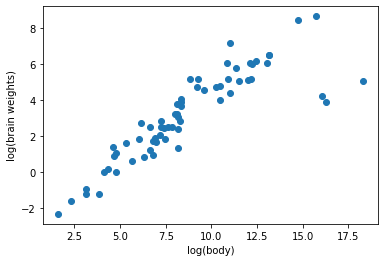

In [56]:
# Plot x_log/y_log
plt.scatter(x_log, y_log)
plt.xlabel('log(body)')
plt.ylabel('log(brain weights)')

## Log-log plot
The plot from above uses a logarithmic scale for both axes. In this exercise, we will fit our models to this transformed version of the data set. Hence, instead of working with an 
x
 and a 
y
variable, we use the 
$\log\left(y\right)=a\log\left(x\right)+b$


If you apply the exponential function to both sides of the equation, you can see that it models a non-linear relationship between the 
x
 and 
y
 variables.

$
\log\left(y\right)=a\log\left(x\right)+b
$

which simplifies to

$
y=e^{a\log\left(x\right)}e^{b}=\left(e^{\log\left(x\right)}\right)^{a}e^{b}=x^{a}e^{b}
$

Hence, the linear regression model fits the 
y
=
c
x
a
 equation where 
c
=
e
b
. We will use this equation in the last part of the exercise to compute the encephalization quotient. You can take a look at page 126 of this publication 
https://www.biodiversitylibrary.org/item/87605#page/146/mode/1up 
if you want to learn more about the measure.



Exercise: Filter outliers and fit a linear regression
---

> **Exercise**: (A) Fit a linear regression to `x_log` and `y_log`. (B) Filter the three outliers. (C) Fit another linear regression. (D) Visually compare the two models by plotting their prediction lines.

Coefficients with LR and RSS: [ 0.59674426 -1.96962141]
Coefficients with LR wo outliers and RSS: [ 0.75836799 -3.12333267]


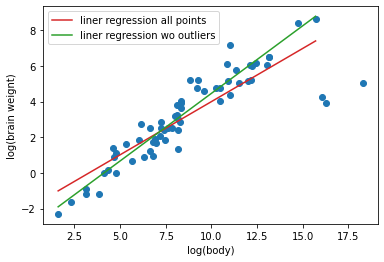

In [58]:
# (A) Fit a linear regression using all the data points
coefs_1 = np.polyfit(x_log, y_log, deg = 1)
print('Coefficients with LR and RSS:', coefs_1)

y_pred_1 = np.polyval(coefs_1, x_log)

# (B) Filter the three outliers
idx = ((x_log > 15.0) & (y_log < 6.0))
# or equivalently:
#idx = np.logical_and((x_log > 15.0), (y_log < 6.0))
# or anotherway of filtering the outliers:
#x_wo=scale(np.log(data_df.drop(data_df[data_df.label.isin(['Triceratops','Dipliodocus','Brachiosaurus'])].index)['body'].values))
#y_wo=np.log(data_df.drop(data_df[data_df.label.isin(['Triceratops','Dipliodocus','Brachiosaurus'])].index)['brain'].values)

# (C) Fit a linear regression using the rest of the data points
x2_log, y2_log = x_log[~idx], y_log[~idx]
coefs_wo = np.polyfit(x2, y2, deg = 1)
print('Coefficients with LR wo outliers:', coefs_wo)

y_pred_wo = np.polyval(coefs_wo, x2)
# (D) Plot the two models

x_log_values = np.linspace(np.min(x2_log), np.max(x2_log), num = 100)
y_values_1 = np.polyval(coefs_1, x_log_values)
y_values_wo = np.polyval(coefs_wo, x_log_values)

plt.scatter(x_log, y_log)
plt.plot(x_log_values, y_values_1, c = 'C3', label = 'liner regression all points')
plt.plot(x_log_values, y_values_wo, c = 'C2', label = 'liner regression wo outliers')
plt.xlabel('log(body)')
plt.ylabel('log(brain weignt)')
plt.legend()
plt.show()

In [22]:
(x_log > 15.0) & (y_log < 6.0)

array([False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [18]:
np.logical_and((x_log > 15.0), (y_log < 6.0))

array([False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [29]:
~idx

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Exercise: Fit a linear regression using Huber loss
---

> **Exercise**: Fit a linear regression to `x_log` and `y_log` using Huber loss. Plot the prediction line.

**Self-assessment**: You should get a result close to the linear regression without outliers.

In [40]:
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import HuberRegressor

Slope Huber SGD: [2.37272124]
Intercept term Huber SGD: [3.25950399]
Slope Huber BFGS: [2.6046927]
Intercept term Huber BFGS: 3.304927656029385


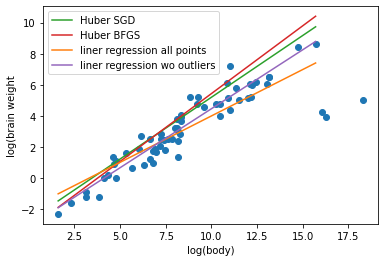

In [66]:
### Fit a linear regression using Huber loss
x_log_scaled = scale(x_log)
lr_huber_SGD = SGDRegressor(loss = 'huber', penalty = 'none', epsilon = 1, max_iter = 100, tol = 1e-3)
lr_huber_SGD.fit(x_log_scaled[:,np.newaxis], y_log)

# not needed but for completeness:
y3_pred = lr_huber_SGD.predict(x_log_scaled[:,np.newaxis])
# y3_pred = lr_huber_SGD.polyval() ?

lr_huber_BFGS = HuberRegressor(epsilon = 1.1)
lr_huber_BFGS.fit(x_log_scaled[:,np.newaxis], y_log)

# not needed but for completeness:
y4_pred = lr_huber_BFGS.predict(x_log_scaled[:,np.newaxis])
# y3_pred = lr_huber_SGD.polyval() ?

# Print the slope of the line
print('Slope Huber SGD:', lr_huber_SGD.coef_)
# Output varies around ?

# Print the intercept parameter
print('Intercept term Huber SGD:', lr_huber_SGD.intercept_)
# Output varies around ?

# Print the slope of the line
print('Slope Huber BFGS:', lr_huber_BFGS.coef_)
# Output varies around ?

# Print the intercept parameter
print('Intercept term Huber BFGS:', lr_huber_BFGS.intercept_)
# Output varies around ?



# Plot the prediction line
# Compute prediction line
x_log_scaled_values = np.linspace(min(x_log_scaled), max(x_log_scaled), num=100) # Shape (100,)

plt.scatter(x_log, y_log)
y_values_huber_SGD = lr_huber_SGD.predict(x_log_scaled_values[:, np.newaxis])
y_values_huber_BFGS = lr_huber_BFGS.predict(x_log_scaled_values[:, np.newaxis])

plt.plot(x_log_values, y_values_huber_SGD, c='C2', label = 'Huber SGD')
plt.plot(x_log_values, y_values_huber_BFGS,  c='C3', label = 'Huber BFGS')
plt.plot(x_log_values, y_values_1, c = 'C1', label = 'liner regression all points')
plt.plot(x_log_values, y_values_wo, c = 'C4', label = 'liner regression wo outliers')

plt.xlabel('log(body)')
plt.ylabel('log(brain weight')

plt.legend()
plt.show()

Exercise: Comptue the *Encephalization Quotient (EQ)*
---

We saw that the equation of a simple linear regression for variables on a logarithmic scale: $\log\left(y\right)=a\log\left(x\right)+b$ is equivalent to $y=cx^{a}$ where $c=e^{b}$. In our example, we can use this equation to calculate the **Encephalization Quotient (EQ)**.

The idea is to compute estimations of brain weights for each data point using $\hat{y}=cx^{a}$ and compare them to the actual brain weights. The EQ coefficient is defined as

$$
\text{EQ}=\frac{y}{\hat{y}}
$$

> **Exercise**: (A) Create the `a` and `c` values using the coefficients of the linear regression model without outliers. (B) Compute the estimated brain weights $\hat{y}$. (C) Compute the EQ values and add them to the `data_df` DataFrame. (D) Print the five rows with the largest quotients.

**Self-assessment**: You should see humans and monkeys in the first places - humans with an EQ around 7.

In [49]:
coefs_wo

array([ 0.75836799, -3.12333267])

In [67]:
# (A) Create a and c values
a = coefs_wo[0]
b = coefs_wo[1]
#or: a, b = coefs_wo
c = np.exp(b)
print('brain = {:.3f}*body^{:.3f}'.format(c, a))


# (B) Compute predicted brain weights
y_pred = c*x**(a)

#or:
#y_pred_log = a*np.log(x) +b
#y_pred = np.exp(y_pred_log)

# or: y_pred = y4_pred
#y3_pred = lr_huber_SGD.predict(x_log_scaled[:,np.newaxis])
#y4_pred = lr_huber_BFGS.predict(x_log_scaled[:,np.newaxis])

# (C) Compute EQ
data_df['EQ'] = y/y_pred

# (D) Print the five largest quotients
data_df.sort_values(by = 'EQ', ascending = False).head(5)

brain = 0.044*body^0.758


,body,brain,label,EQ
48,62000.0,1320.0,Human,6.960230
57,6800.0,179.0,Rhesus monkey,5.044836
26,10550.0,179.5,Baboon,3.625807
22,480.0,15.5,Owl monkey,3.261447
21,101.0,4.0,Ground squirrel,2.744688


First, the two estimators use different optimization algorithms. The SGDRegressor one uses stochastic gradient descent (SGD) while HuberRegressor uses BFGS which should be more efficient when there is a small number of samples and should converge in fewer iterations to the optimal solution. Also, the delta threshold δ in Huber loss (epsilon in Scikit-learn) depends on the scale of the residuals, and the HuberRegressor estimator implements a mechanism to make this parameter scale invariant.

## Questions:
1. In the solution, the input to the Huber Regressor is not scaled. Why?
2. The results are slightly different from the solution, so I want to discuss the result.

### Alternative Solution (copied from the questions):

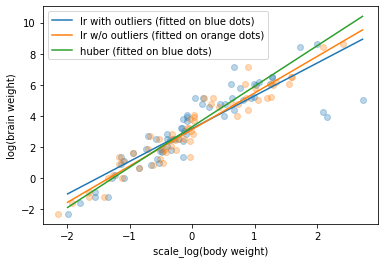

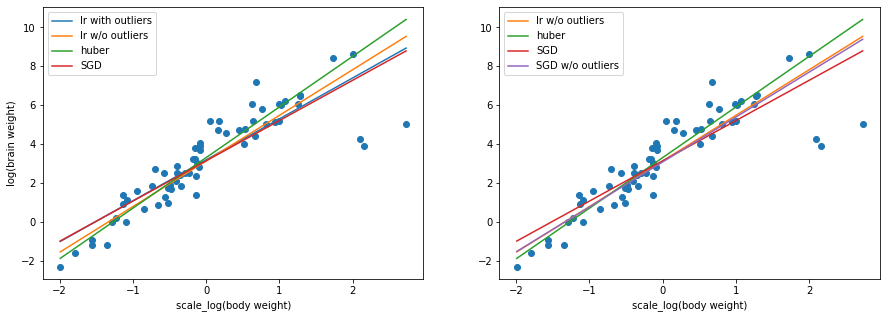

In [69]:
x_slog = scale(np.log(data_df.body.values))
y_log  = np.log(data_df.brain.values)

# drop outliers
idx = data_df[data_df.label.isin(['Triceratops','Dipliodocus','Brachiosaurus'])].index

x_slog_wo = scale(np.log(data_df.drop(idx)['body'].values))
y_log_wo  = np.log(data_df.drop(idx)['brain'].values)

x_values = np.linspace(min(x_slog), max(x_slog), num=100)

# Fit linear regressions with and w/o outliers
coefs    = np.polyfit(x_slog,    y_log, deg=1)
coefs_wo = np.polyfit(x_slog_wo, y_log_wo, deg=1)

y_values    = np.polyval(coefs,    x_values)
y_values_wo = np.polyval(coefs_wo, x_values)

# Fit a huber linear regression with outliers
lr_huber = HuberRegressor(epsilon=1.1) 
lr_huber.fit(x_slog[:,np.newaxis],y_log)
y_huber = lr_huber.predict(x_values[:, np.newaxis])

# Plot the prediction line
plt.scatter(x_slog,    y_log,   alpha=0.3)
plt.scatter(x_slog_wo, y_log_wo,alpha=0.3)

plt.plot(x_values, y_values,    c='C0',label='lr with outliers (fitted on blue dots)')
plt.plot(x_values, y_values_wo, c='C1',label='lr w/o outliers (fitted on orange dots)')
plt.plot(x_values, y_huber,     c='C2',label='huber (fitted on blue dots)')

plt.xlabel('scale_log(body weight)')
plt.ylabel('log(brain weight)')
plt.legend()
plt.show()


# Fit a SGD regression with outliers

lr_sgd = SGDRegressor(loss='squared_loss', tol=1e-3)
lr_sgd.fit(x_slog[:,np.newaxis],y_log)
y_sgd  = lr_sgd.predict(x_values[:, np.newaxis])

# Fit a SGD regression w/o outliers

lr_sgd_wo = SGDRegressor(loss='squared_loss', tol=1e-3)
lr_sgd_wo.fit(x_slog_wo[:,np.newaxis],y_log_wo)
y_sgd_wo = lr_sgd_wo.predict(x_values[:, np.newaxis])


# Plot the prediction line
fig, axes = plt.subplots(1,2, sharex=True, figsize=(15,5))

axes[0].scatter(x_slog, y_log)
axes[0].plot(x_values, y_values,    c='C0',label='lr with outliers')
axes[0].plot(x_values, y_values_wo, c='C1',label='lr w/o outliers')
axes[0].plot(x_values, y_huber,     c='C2',label='huber')
axes[0].plot(x_values, y_sgd,       c='C3',label='SGD')
axes[0].set_xlabel('scale_log(body weight)')
axes[0].set_ylabel('log(brain weight)')
axes[0].legend()

axes[1].scatter(x_slog, y_log)
axes[1].plot(x_values, y_values_wo, c='C1',label='lr w/o outliers')
axes[1].plot(x_values, y_huber,     c='C2',label='huber')
axes[1].plot(x_values, y_sgd,       c='C3',label='SGD')
axes[1].plot(x_values, y_sgd_wo,    c='C4',label='SGD w/o outliers')
axes[1].set_xlabel('scale_log(body weight)')
axes[1].legend()
plt.show()